In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Parameters of the Simulation
tot_time = 180
t_stat = 10 # We suppose at this time the system got into an stationary state
tot_runs = 100
fmag = 7.2

# Extract Relevant Data from Sample
dir_sample = r"./mag&freq/" + r"/data_fmag1_ffreq3_2runs/" + "results.csv"
sample = pd.read_csv(dir_sample)
tot_frames = len(sample["frame"].tolist())/2
time_per_frame = tot_time / tot_frames
time_array = np.linspace(0, int(tot_time), int(tot_frames))

# General data for stationary analysis
t_stat_idx = np.argmin(np.abs(time_array - t_stat))
n_data = len(time_array[t_stat_idx:-1])

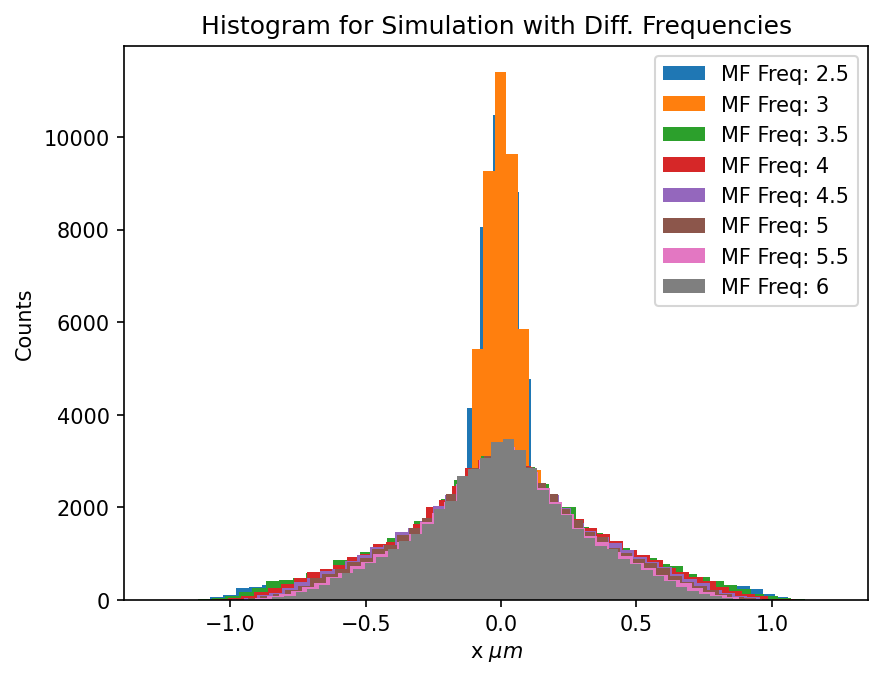

In [2]:
# freqs = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6] # All samples
freqs = [2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6] # Samples with single-gaussian behavior


plt.figure(dpi=150)
for freq in freqs:
    dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq}_{tot_runs}runs/" + "results.csv"
    data = pd.read_csv(dir_data)
    x_array = np.zeros(tot_runs * n_data)
    for i in range(tot_runs):
        part = data[data["run_number"] == i + 1]
        x_part = np.array(part.x_pos.tolist())
        x_part = x_part - x_part[0]
        x_array[n_data * i : n_data * (i + 1)] = x_part[t_stat_idx:-1]
    # Obtain Data for Graph
    plt.hist(x_array, bins=50, label=f"MF Freq: {freq}")
plt.title("Histogram for Simulation with Diff. Frequencies")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts")
plt.legend()
plt.show()

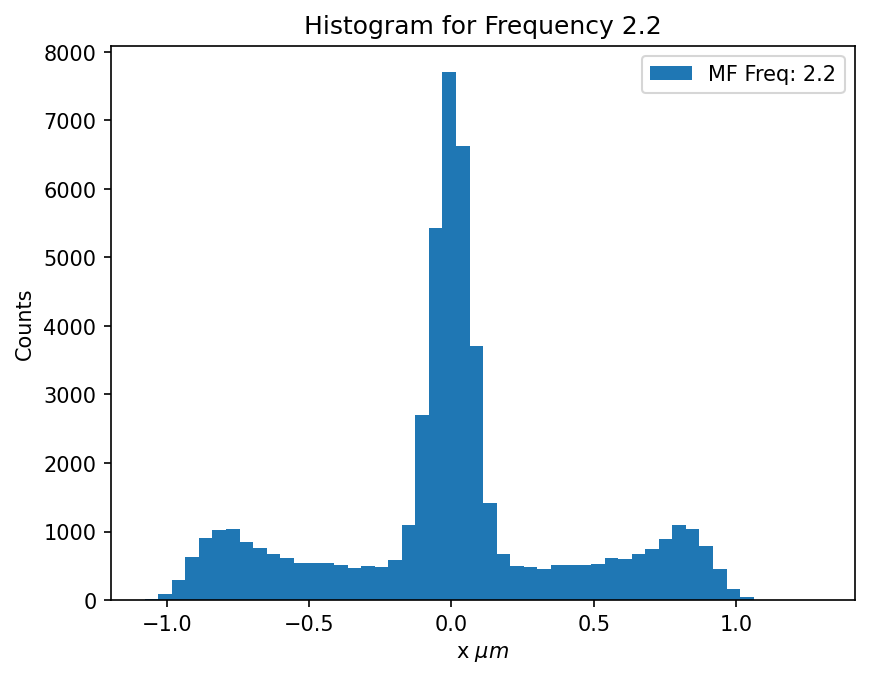

In [3]:
# Choose an specific frequency to "analyze": See histogram
freq_a = 2.2

plt.figure(dpi=150)
dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq_a}_{tot_runs}runs/" + "results.csv"
data = pd.read_csv(dir_data)
x_array = np.zeros(tot_runs * n_data)
for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    x_array[n_data * i : n_data * (i + 1)] = x_part[t_stat_idx:-1]
# Obtain Data for Graph
plt.hist(x_array, bins=50, label=f"MF Freq: {freq_a}")
plt.title(f"Histogram for Frequency {freq_a}")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts")
plt.legend()
plt.show()

#### Phi Parameter Analysis
Make gaussian fits - Compare data, obtain parameter phi - Analyze tails of PD

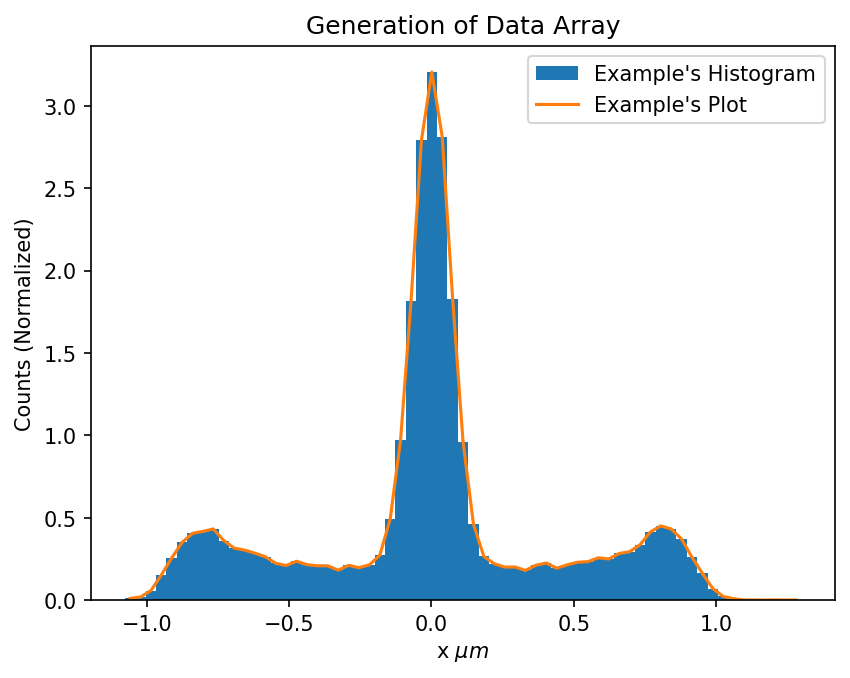

In [4]:
# Example to generate plot from data - histogram
num_bins = 65 # "Resolution", number of classes
for i in range(tot_runs):
    part = data[data["run_number"] == i + 1]
    x_part = np.array(part.x_pos.tolist())
    x_part = x_part - x_part[0]
    x_array[n_data * i : n_data * (i + 1)] = x_part[t_stat_idx:-1]

counts_freq, bin_edges = np.histogram(x_array, bins=num_bins, density=True) # Bin edges its just used for getting x later.
x_freq = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure(dpi=150)
plt.hist(x_array, bins=num_bins, label="Example's Histogram", density=True)
plt.plot(x_freq, counts_freq, label="Example's Plot")
plt.title("Generation of Data Array")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts (Normalized)")
plt.legend()
plt.show()

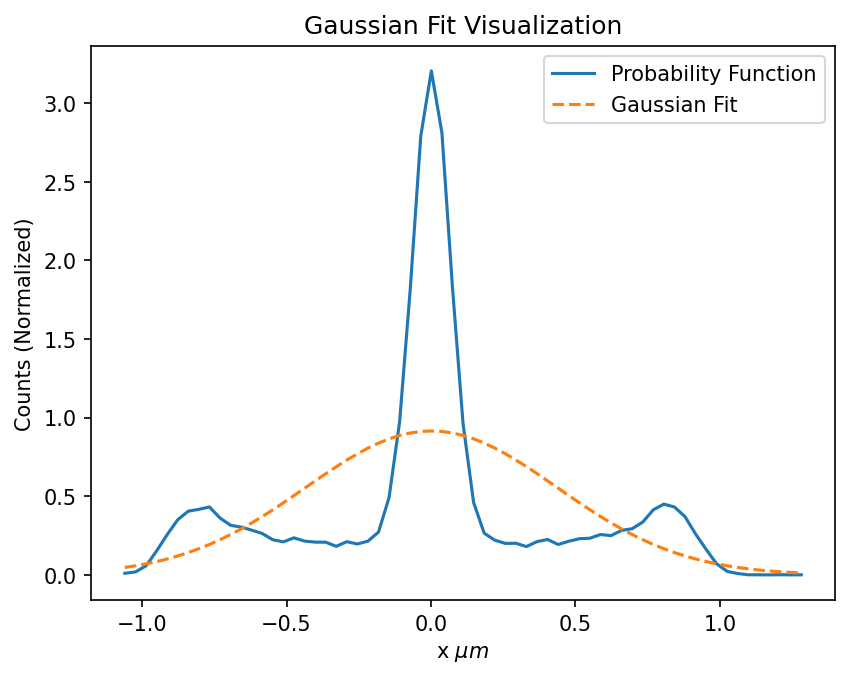

In [5]:
# Single Gaussian Fit Visualizer
counts_ex, bin_edges = np.histogram(x_array, bins=num_bins, density=True)
x_ex = 0.5 * (bin_edges[1:] + bin_edges[:-1])
mu_ex, std_ex = norm.fit(x_array)
pdf_ex = norm.pdf(x_ex, mu_ex, std_ex)

# Comparison
plt.figure(dpi=150)
plt.plot(x_ex, counts_ex, label=r"Probability Function")
plt.plot(x_ex, pdf_ex, '--', label=r"Gaussian Fit")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts (Normalized)")
plt.legend(loc='upper right')
plt.title("Gaussian Fit Visualization")
plt.show()


C:\Users\emino\AppData\Local\Temp\ipykernel_21872\24050271.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((1e-4,0))


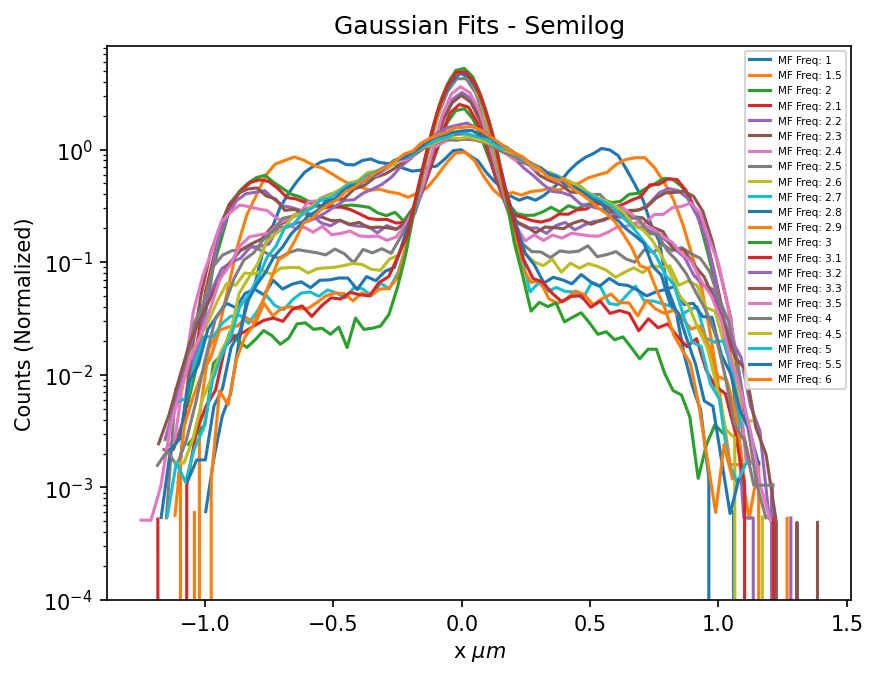

In [6]:
# Make the conversion to the plot - plot them to compare them - get the parameter phi
# freqs_gaus = [2.3, 2.4, 2.5, 2.6, 3, 3.5, 4, 4.5, 5, 5.5, 6]
# freqs_tot = [1, 1.5, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.5, 4, 4.5, 5, 5.5, 6]
# freqs_gaus = [2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.5, 4, 4.5, 5, 5.5, 6]
freqs_gaus = [1, 1.5, 2, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.5, 4, 4.5, 5, 5.5, 6]
phi = np.zeros(len(freqs_gaus))

plt.figure(dpi=150)
for idx, freq in enumerate(freqs_gaus):
    
    dir_data = r"./mag&freq/" + f"/data_fmag{fmag}_ffreq{freq}_{tot_runs}runs/" + "results.csv"
    data = pd.read_csv(dir_data)
    x_array = np.zeros(tot_runs * n_data)
    
    for i in range(tot_runs):
        part = data[data["run_number"] == i + 1]
        x_part = np.array(part.x_pos.tolist())
        x_part = x_part - x_part[0]
        x_array[n_data * i : n_data * (i + 1)] = x_part[t_stat_idx:-1]
    
    # Data Obtained - Fit and Get Phi Parameter
    # Data
    counts_freq, bin_edges = np.histogram(x_array, bins=num_bins, density=True)
    x_freq = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    plt.semilogy(x_freq, counts_freq, label=f"MF Freq: {freq}")
    
    # Gaussian Fit
    mu_f, std_f = norm.fit(x_array)
    pdf_f = norm.pdf(x_freq, mu_f, std_f) # Probability density function
    # plt.semilogy(x_freq, pdf_f, '--', label=f"Fit for Freq {freq}: μ={mu_f:.2f}, σ={std_f:.2f}") # Plot to watch comparison
    phi[idx] = sum((pdf_f - counts_freq)**2) # Difference squared, in all the points of data
    
# End of Plot - Show    
plt.title(f"Gaussian Fits - Semilog")
plt.xlabel(r"x $\mu{}m$")
plt.ylabel(r"Counts (Normalized)")
plt.ylim((1e-4,0))
plt.legend(fontsize=5, loc='upper right')
plt.show()


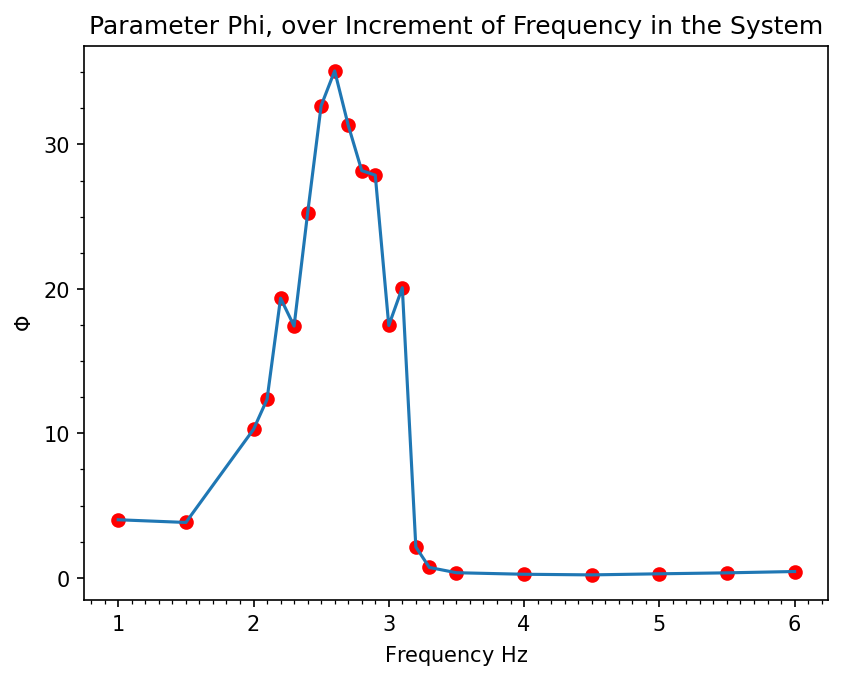

In [7]:
from matplotlib import ticker

plt.figure(dpi=150)
plt.plot(freqs_gaus, phi)
plt.scatter(freqs_gaus, phi, color="r")
plt.title("Parameter Phi, over Increment of Frequency in the System")
plt.xlabel(r"Frequency $\text{Hz}$")
plt.ylabel(r"$\Phi$")
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1.00)) # Showing the number
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1)) # Not showing the number
ax.yaxis.set_major_locator(ticker.MultipleLocator(10)) # Showing the number
ax.yaxis.set_minor_locator(ticker.MultipleLocator(2.5)) # Not showing the number
plt.show()